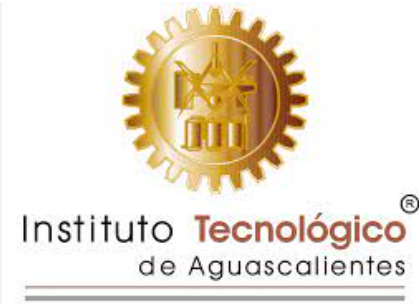
*Instituto Tecnológico de Aguascalientes*  
---

#  Proyecto de Series de Tiempo
#### **Estadística Inferencial 2**  
*Alumna: Dulce Ximena Davalos Flores*  

*Fecha: 12/05/2025*  


# **Introducción**

En este proyecto se analizaran los datos de dos marcas conocidasç: Target y Costco. Como ambas compiten en el mismo mercado y ofrecen productos similares, podrían estar relacionadas entre sí en cómo cambian a lo largo del tiempo.

Primero, se estudia cada serie de tiempo por separado para entender su comportamiento: si tienen tendencia, estacionalidad o patrones repetitivos. Luego, se aplica la prueba de causalidad de Granger para ver si una marca puede ayudar a predecir a la otra.

# **Marco Teórico**

##Análisis de Series de Tiempo

Una serie de tiempo es una colección de datos reunidos sobre la misma variable a lo largo del tiempo; [Hildebrand, 1998].


Una serie de tiempo es una secuencia de datos u observaciones medidos en determinados momentos, en intervalos iguales o desiguales, y ordenados cronológicamente.


El análisis de series de tiempo se refiere al proceso de analizar los datos disponibles para descubrir el patrón o la tendencia en los datos. Permite extraer y modelar las relaciones entre datos a lo largo del tiempo, sea extrapolando (hacia futuro) o interpolando (hacia el pasado) el comportamiento de datos no observados.

En general los análisis de series de tiempo tienen los siguientes tres pasos:

- Análisis exploratorio
- Escogencia y ajuste del modelo
- Diagnóstico

Además, existen dos técnicas de modelado principales para hacer análisis de series de tiempo:

- Holt Winters
- ARIMA models
- Análisis exploratorio

Dentro del análisis exploratorio de series de tiempo se pueden realizar los siguientes procedimientos:

- Estimación de tendencias y descomposición: Se utiliza para el ajuste estacional. Busca construir, a partir de una serie temporal observada, una serie de subcomponentes con diferentes características.

- Análisis de autocorrelación: permite estimar qué valor en el pasado tiene una correlación con el valor actual. Proporciona la estimación de los factores p, d, q para los modelos ARIMA.

- Análisis espectral: Describe cómo la variación en una serie de tiempo puede ser explicada por componentes cíclicos. Permite separar los componentes periódicos en un ambiente ruidoso.

##Aplicación

Las series de tiempo tiene dos propósitos: comprender las fuerzas de influencia en los datos y descubrir la estructura que produjo los datos observados. Ajustar el modelo y proceder a realizar pronósticos, monitoreo, retroalimentación y control en avance.


Algunos ejemplos donde se puede utilizar series temporales:

- Pronósticos temporales.
- Economía (presupuestos) y
- Marketing (Mercados económicos)
- Proyecciones del empleo y desempleo.
- Evolución del índice de precios al consumidor IPP
- Beneficios netos mensuales de cierta entidad bancaria.
- Índices del precio del petróleo.
- Número de habitantes por año.
- Tasa de mortalidad infantil por año.
- Lluvia recogida diariamente en una localidad.
- Temperatura media mensual.

##Componentes de las series de tiempo
- Tendencia: Es el patrón subyacente en los datos a lo largo del tiempo. No es necesariamente lineal.

-Estacionalidad: Cuando una serie está influenciada por factores estacionales de periodo fijo como el dia, mes, trimestre.

- Cíclicidad: Cuando los datos muestran subidas y caídas que no son del período fijo. Las fluctuaciones suelen ser de al menos 2 años.

- Aleatoriedad: parte inexplicable de los datos

Otras definiciones incluyen el **ruido blanco (White noise)** referente a la suposición de que los valores en una serie de tiempo son aleatorios, independientes entre sí (no están correlacionados), tienen una media de cero y varianza constante. Cuando estos supuestos no se cumplen se deben aplicar modelos autorregresivos (AR) y de media móvil (MA) para corrigir las infracciones de esta suposición.

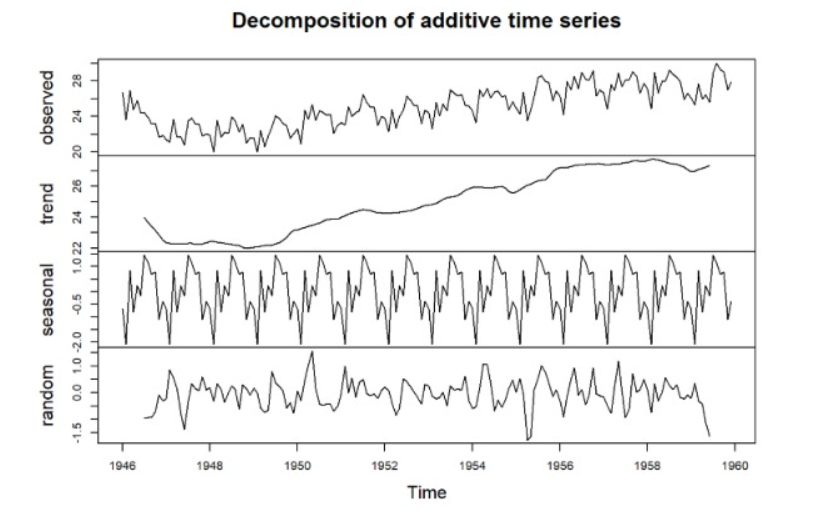


##ARIMA

ARIMA es una abreviación de AutoRegressive Integrated Moving Average. En sí, es una combinación de las propiedades de diferentes tipos de modelos:

- (AR) Auto Regressive Son modelos donde el valor de una variable en un periodo se relaciona con los valores de periodos previos. Se refiere a los lags p de las diferencias de los valores entre las series.

- (I) se refiere al orden del número diferencial que se usan para hacer las series de tiempo estacionarias.

- (MA) Moving Average Consideran la posibilidad de una relación entre la variable y los residuales de periodos previos. Se refiere a los lags q de los errores,

##Supuestos del ARIMA

Los datos deben ser estacionarios: las propiedades de la serie no dependen del momento en que se capturan. Un proceso estacionario tiene una media y una variación que no cambian con el tiempo y no tiene una tendencia. Los datos deben ser univariados: ARIMA trabaja con una sola variable. La regresión automática tiene que ver con la regresión con los valores pasados.

https://bookdown.org/keilor_rojas/CienciaDatos/an%C3%A1lisis-de-series-de-tiempo.html

https://gc.scalahed.com/recursos/files/r161r/w24481w/S9_R01.pdf


# **Target Corporation Common Stock (TGT)**

             TIENDA 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


df = yf.download(
    tickers='TGT',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2017-03-05',        # Fecha de inicio
    end='2019-03-05',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )


df = df.reset_index()

df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]



df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date

df.set_index('Date', inplace=True)

df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TGT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Adj Close,TGT_Volume
Date,,,,,,


In [4]:
pip install alpha_vantage

In [5]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = ' KSZKZM73673SN0XD'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')


ticker = 'TGT'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Volume
date,,,,,
2025-04-01,104.98,105.5900,103.5300,104.43,6240546.0
2025-03-31,102.00,104.6600,100.5000,104.36,7069227.0
2025-03-28,104.49,105.3900,102.3700,103.65,9704436.0
2025-03-27,105.80,107.9800,105.7200,106.51,5015251.0
2025-03-26,105.76,106.6699,104.9700,106.09,5497126.0
...,...,...,...,...,...
2024-01-08,140.20,141.9900,139.5600,141.73,3563278.0
2024-01-05,139.32,141.9500,139.3200,140.75,2730668.0
2024-01-04,138.86,140.9250,137.7000,140.25,3903017.0


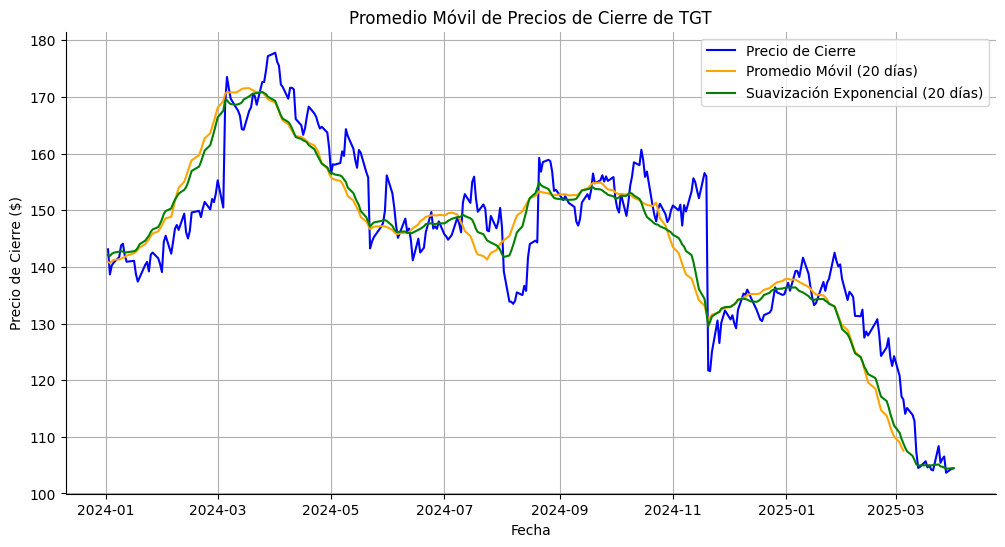

In [9]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['TGT_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['TGT_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TGT_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de TGT')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


###**Analisis:**

El gráfico muestra que el precio de las acciones de TGT tuvo una tendencia a la alta durante los primeros meses de 2024, alcanzando su punto mas alto en marzo. Sin embargo, a partir de ese pico, comenzó una tendencia a la baja, con una caída en finales de 2024. En los primeros meses de 2025, el precio continuó bajando.

In [10]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['TGT_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -2.8236316427398407
p-value: 0.05497663871708202
La tendencia no es estacionaria (aceptamos la hipótesis nula).


###**Analisis:**

Se acepta  la hipótesis nula, la serie no es estacionaria.

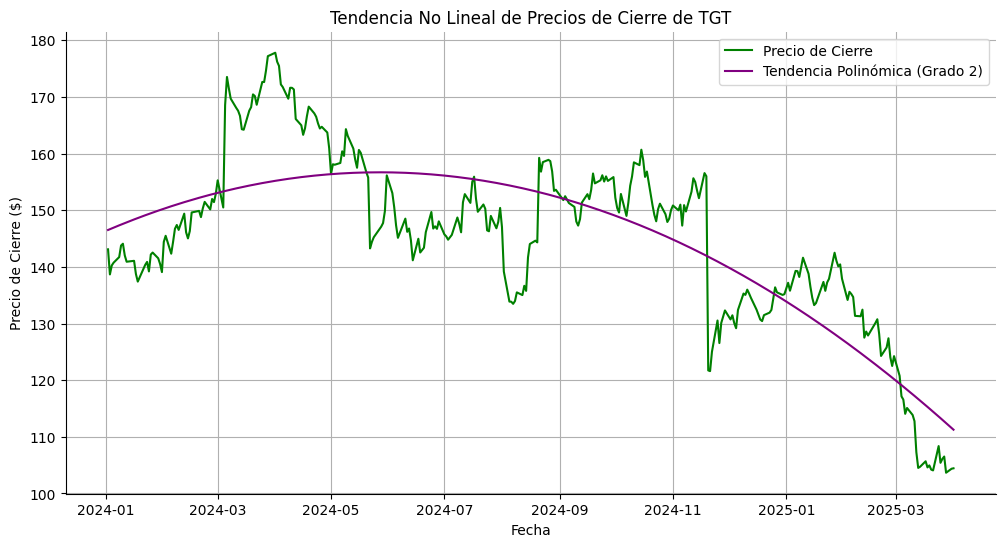

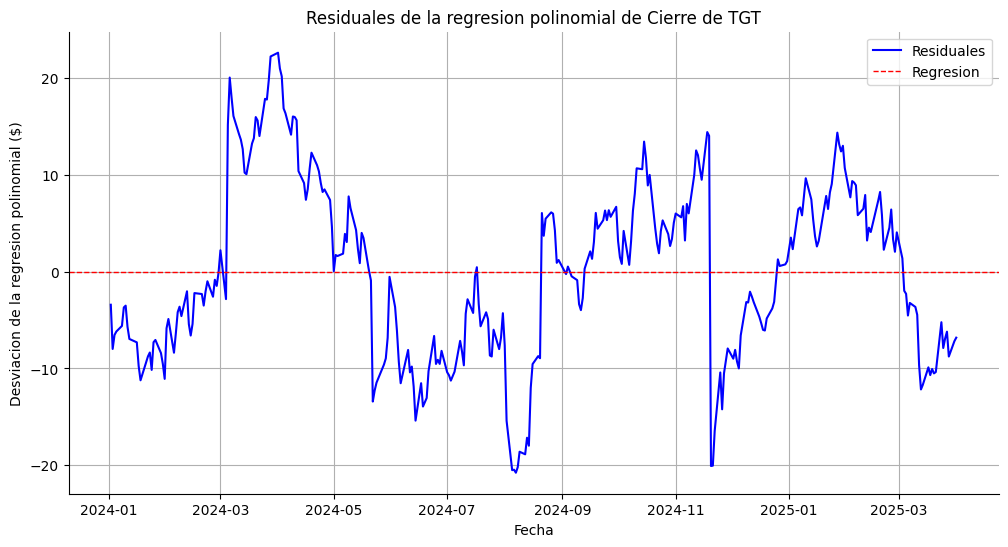

In [11]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TGT_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de TGT') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de TGT')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

###**Analisis:**

En el grafico de residuales se puede ver que Los valores suben y bajan entre los -20 y +25 dólares, pero no se puede ver con mucha claridad los resulltados pero si se puede decir que hay mucha variación porque algunos cambios son muy bruscos, lo que puede ser por situaciones inesperadas que el modelo no puede describir bien.


In [12]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['GOOGL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.009585  1136.654182        104.333333
1    0.006390  1057.455062        156.500000
2    0.012780   571.765077         78.250000
3    0.015974   363.031234         62.600000
4    0.025559   360.397894         39.125000


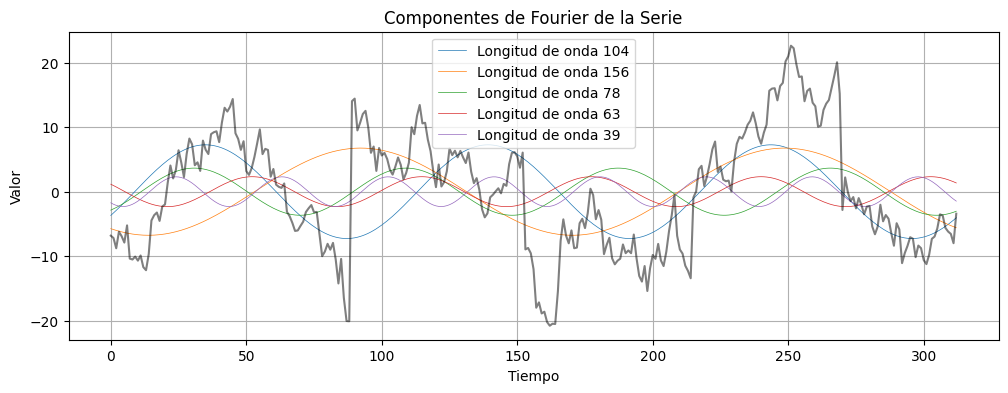

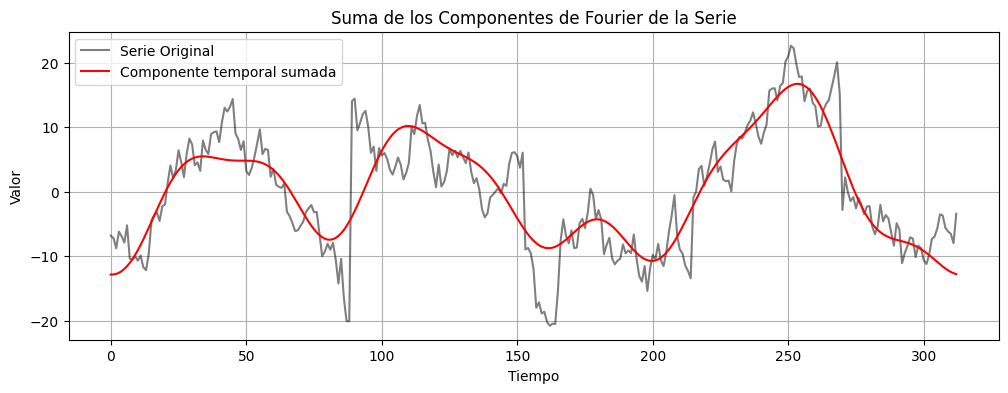

In [13]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


###**Analisis:**

En el grafico de componenete de fourer se presentan varias ondas simples que  tratan de explicar el precio de TGT. Cada una de estas ondas representa un patrón que se repite con freceuncia, ya que las ondas al parecer se ve que no varian.

Al hacer los cálculos basándome en los 252 dias, la que más se acerca a 0.05 es la longitud de 104, pero si dividimos la longitud de 63/ 252 nos da exactamente los 0.25 lo que nos indica que ahí está el pico. Asi mismo también nos muestra una estacionalidad casi perfecta.



En el grafico de l suma de componentes la línea gris sigue siendo el precio original de TGT y la línea roja es la suma de las ondas de colores, y en la línea roja se muestra  el comportamiento del precio, y se ve que no tiene mucho ruido ni movimientos bruscos.




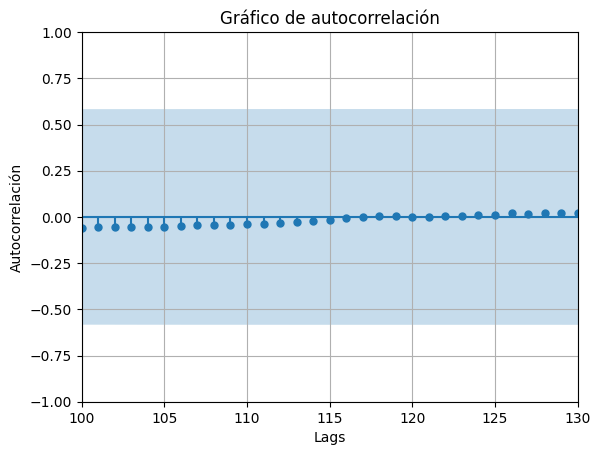

In [14]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['TGT_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

###**Analisis:**

Todos los puntos están muy cerca de cero y dentro de la zona azul y esto dice que no hay una relación significativa entre los valores de la grafica.Lo que quiere decir que los valores pasados de hace 100 a 130 días no ayudan a predecir el valor actual.

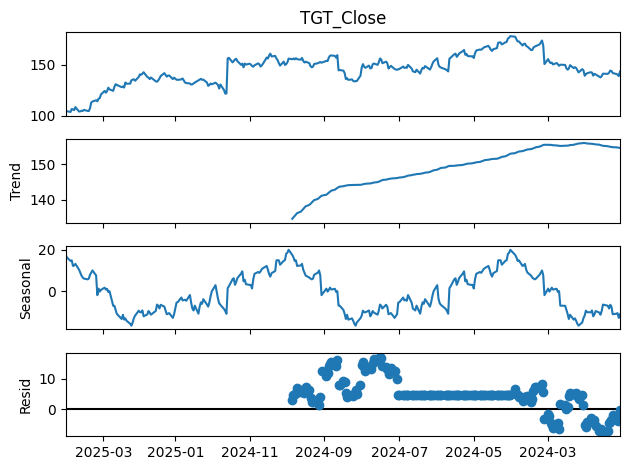

In [15]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['TGT_Close'],
    model='additive',
    period=126,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

###**Analisis:**

**Tendencia:**

Muestra el comportamiento del precio, y se ve una tendencia a la alta constante durante gran parte del período, peo al final parece estabilizarse o caer un poco.

**Estacionalidad:**

Muestra una tendencia no lineal, que se comprobo en los promedios móviles en su Ho y en la descomposición se muestran cambios graduales y algunas variaciones pero no son extremas.

**Residuos:**

Tienen un comportamiento de ruido de forma aleatoria, con pequeñas subidas y bajadas, peo en algun punto el precio se desvió mucho de lo esperado, pudo ser que influyera el como se encuentra la economia.







# **Prohopet**

Este modelo fue introducido por Facebook (S. J. Taylor & Letham, 2018), originalmente para predecir datos diarios con estacionalidad semanal y anual, además de efectos de vacaciones. Más tarde se amplió para cubrir más tipos de datos estacionales. Funciona mejor con series temporales que tienen una fuerte estacionalidad y varias temporadas de datos históricos.

Prophet se destaca por su capacidad para manejar datos con tendencias no lineales y para adaptarse a cambios inesperados en las tendencias.

Funciona bien con datos diarios, semanales y anuales que presentan patrones estacionales irregulares y es robusto frente a los datos faltantes y a los cambios en la tendencia. Prophet permite a los usuarios incorporar componentes de tendencias, estacionalidad y días festivos en sus modelos de pronóstico, facilitando así análisis predictivos precisos y eficientes. Es ampliamente utilizado en diversos campos, desde el análisis de tráfico web hasta la planificación de la cadena de suministro, gracias a su flexibilidad y facilidad de uso.

https://otexts.com/fppsp/causalidad.html

https://foqum.io/blog/termino/prophet/

In [16]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='TGT',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2018-01-01',        # Fecha de inicio
    end='2018-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TGT']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Adj Close,TGT_Volume
Date,,,,,,


In [17]:
pip install alpha_vantage

In [18]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = ' KSZKZM73673SN0XD'

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')


ticker = 'TGT'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df2= data[(data.index >= inicio) & (data.index <= fin)]

df2

,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Volume
date,,,,,
2025-04-01,104.98,105.5900,103.5300,104.43,6240546.0
2025-03-31,102.00,104.6600,100.5000,104.36,7069227.0
2025-03-28,104.49,105.3900,102.3700,103.65,9704436.0
2025-03-27,105.80,107.9800,105.7200,106.51,5015251.0
2025-03-26,105.76,106.6699,104.9700,106.09,5497126.0
...,...,...,...,...,...
2024-01-08,140.20,141.9900,139.5600,141.73,3563278.0
2024-01-05,139.32,141.9500,139.3200,140.75,2730668.0
2024-01-04,138.86,140.9250,137.7000,140.25,3903017.0


In [19]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/3xk4p3jx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/v34a21j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11211', 'data', 'file=/tmp/tmpg3fsjcgq/3xk4p3jx.json', 'init=/tmp/tmpg3fsjcgq/v34a21j4.json', 'output', 'file=/tmp/tmpg3fsjcgq/prophet_modelxz1aj9fm/prophet_model-20250511044831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:31 - cmdstanpy - INFO - Chain

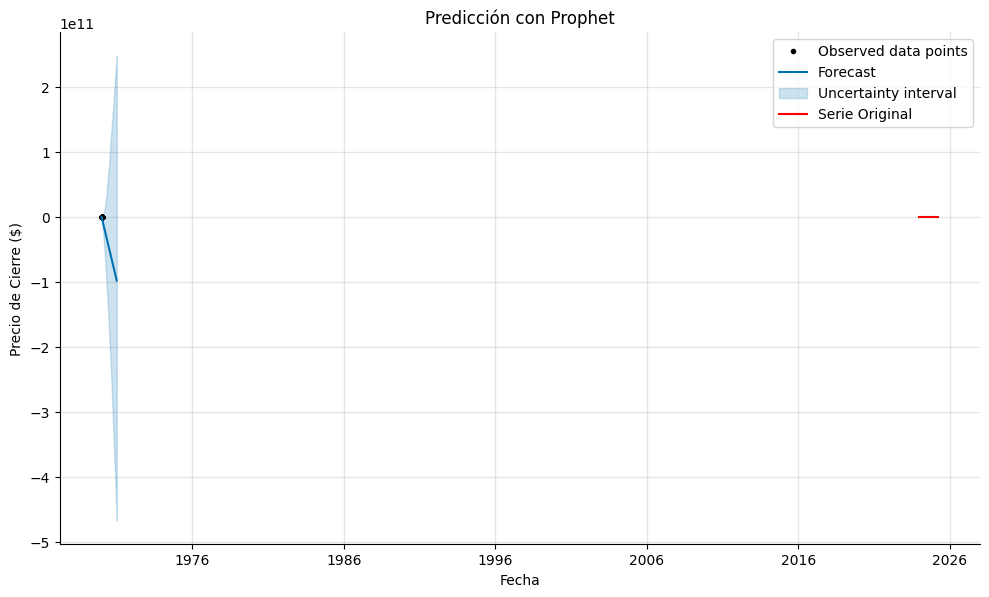

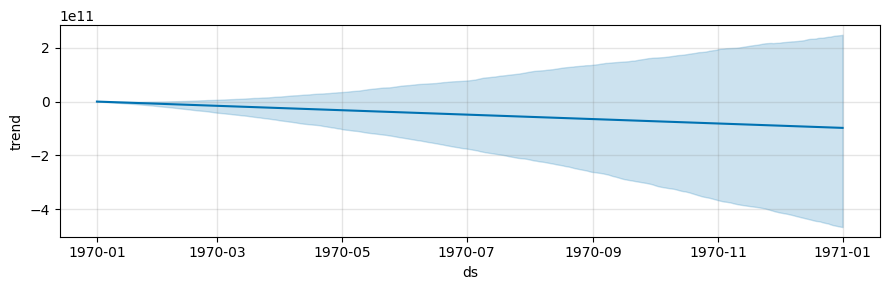

In [20]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
df = df.reset_index()
modelo.fit(df[['Date', 'TGT_Close']].rename(columns={'Date': 'ds', 'TGT_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['TGT_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/byf1gvyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/tix8c5u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45080', 'data', 'file=/tmp/tmpg3fsjcgq/byf1gvyj.json', 'init=/tmp/tmpg3fsjcgq/tix8c5u8.json', 'output', 'file=/tmp/tmpg3fsjcgq/prophet_modelag59c94b/prophet_model-20250511044834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


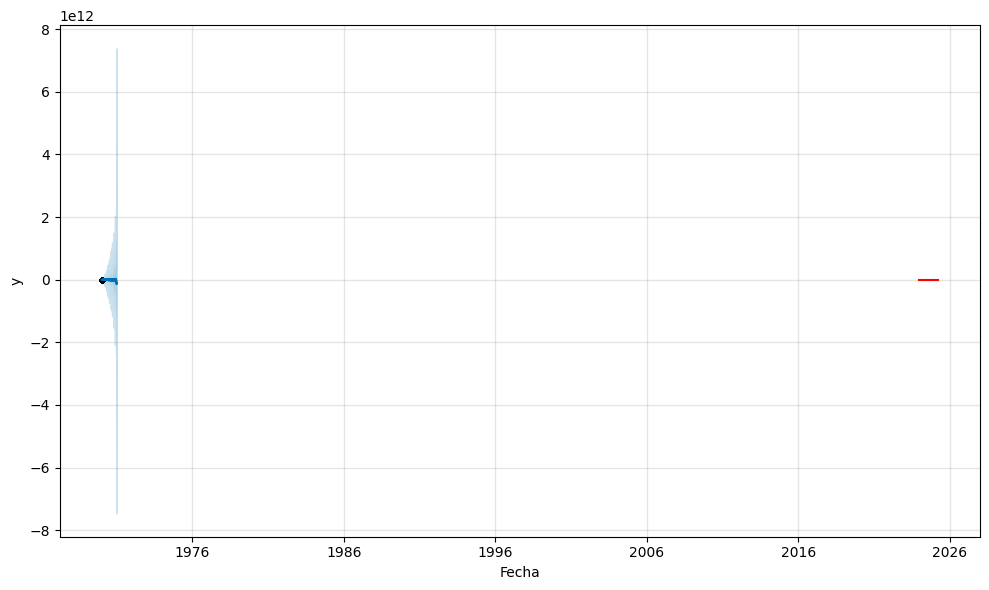

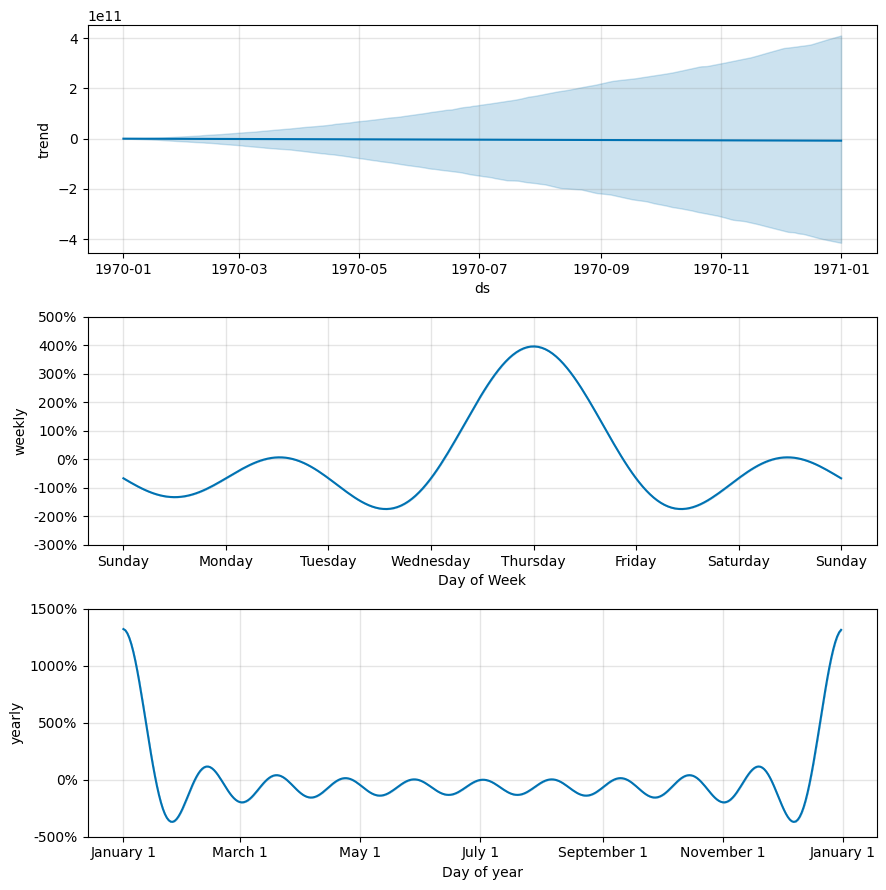

In [21]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df.reset_index()[['Date', 'TGT_Close']].rename(columns={'Date': 'ds', 'TGT_Close': 'y'}))


# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['TGT_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


###**Analisis:**

En el grafico de weekly nos muestra que los dias que mas se venden son los fines de semana pero se vende mas el dia domingo, lo cual este grafico de prophet les sirve para saber que dia ocupan tener mas personas o hacer publicidad para tener aun mas ventas.

En el grafico de yearly depende mucho las fechas que TGT usa como por ejemplo el black friday, las ventas de navidad y el 4 de julio, y este grafico lo pueden utilizar para ajustar su inventario para evitar que se acabe su mercancia y para saber que descuentos se pueden aplicar en enero para limpiar lo que les quedodel año o temporadas pasadas.

# **Costco Wholesale Corporation Common Stock (COST)**

               TIENDA 2  

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')


df = yf.download(
    tickers='COST',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2017-03-05',        # Fecha de inicio
    end='2019-03-05',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )


df = df.reset_index()

df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]



df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date

df.set_index('Date', inplace=True)

df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COST']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,COST_Open,COST_High,COST_Low,COST_Close,COST_Adj Close,COST_Volume
Date,,,,,,


In [23]:
pip install alpha_vantage

In [24]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = ' KSZKZM73673SN0XD'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')


ticker = 'COST'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,COST_Open,COST_High,COST_Low,COST_Close,COST_Volume
date,,,,,
2025-04-01,942.42,957.7236,938.7500,954.40,2041507.0
2025-03-31,922.36,995.0000,922.0432,945.78,3101963.0
2025-03-28,937.50,938.7500,926.0000,929.66,2100487.0
2025-03-27,929.56,942.9037,928.0000,938.75,1546989.0
2025-03-26,934.33,939.4151,923.4500,929.75,1646854.0
...,...,...,...,...,...
2024-01-08,655.81,662.0800,654.0338,661.69,2245294.0
2024-01-05,656.18,659.6500,652.2400,656.01,2200193.0
2024-01-04,642.08,649.9000,640.5101,648.35,2171077.0


In [ ]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

# API Key
my_key = 'KSZKZM73673SN0XD'
ts = TimeSeries(key=my_key, output_format='pandas')

# Descargar datos TSM
data_tsm, _ = ts.get_daily(symbol='TGT', outputsize='full')
data_tsm.columns = ['TGT_Open', 'TGT_High', 'TGT_Low', 'TGT_Close', 'TGT_Volume']
data_tsm = data_tsm.sort_index()  # <- línea clave
df_tsm = data_tsm.loc['2020-01-01':'2025-04-01']


# Descargar datos ORCL
data_orcl, _ = ts.get_daily(symbol='COST', outputsize='full')
data_orcl.columns = ['COST_Open', 'COST_High', 'COST_Low', 'COST_Close', 'COST_Volume']
data_orcl = data_orcl.sort_index()  # <- línea clave
df_orcl = data_orcl.loc['2020-01-01':'2025-04-01']

# Unir y limpiar
df = pd.concat([df_tsm['TGT_Close'], df_orcl['COST_Close']], axis=1).dropna()

# Prueba de Estacionariedad
def prueba_adf(serie, nombre):
    resultado = adfuller(serie)
    print(f'--- ADF para {nombre} ---')
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'p-valor: {resultado[1]}')
    print(f'Valores críticos: {resultado[4]}\n')

prueba_adf(df['TGT_Close'], 'TSM')
prueba_adf(df['COST_Close'], 'ORCL')

# Diferenciar si no son estacionarias
if adfuller(df['TGT_Close'])[1] > 0.05:
    df['TGT_Close'] = df['TGT_Close'].diff()
if adfuller(df['COST_Close'])[1] > 0.05:
    df['COST_Close'] = df['COST_Close'].diff()

df = df.dropna()

# Prueba de Granger
print("\n--- ¿TGT causa COST? ---")
grangercausalitytests(df[['COST_Close', 'TGT_Close']], maxlag=5, verbose=True)

print("\n--- ¿COST causa TGT? ---")
grangercausalitytests(df[['TGT_Close', 'COST_Close']], maxlag=5, verbose=True)

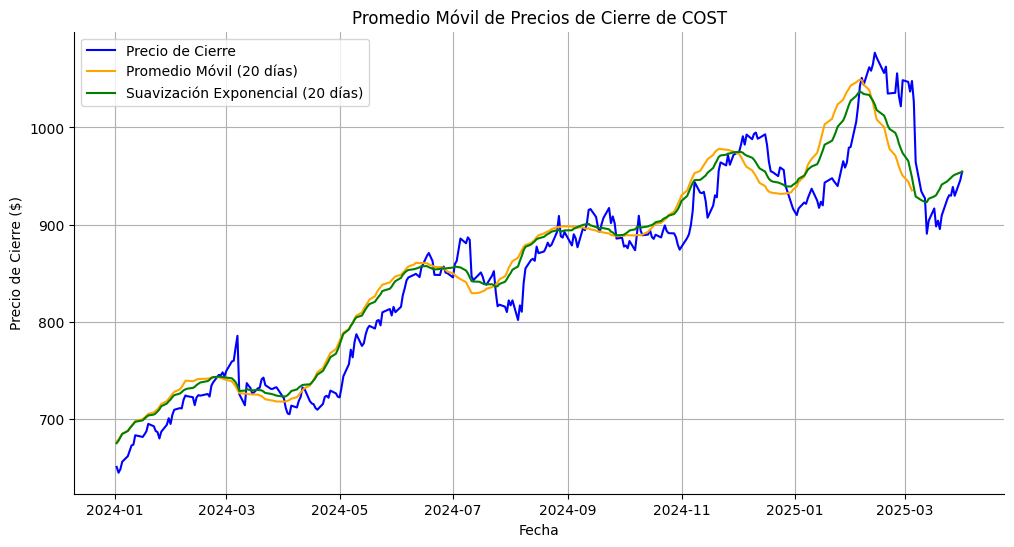

In [25]:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['COST_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['COST_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['COST_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


###**Analisis:**
El gráfico muestra una tendencia a la alta en el precio de las acciones de COSTCO desde principios de 2024 hasta inicios de 2025, pero a partir de febrero de 2025, tiene una caída en el precio, y vuelve a subir un poco hacia marzo y abril.

In [26]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['COST_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -0.44263188075430854
p-value: 0.9027337690067312
La tendencia no es estacionaria (aceptamos la hipótesis nula).


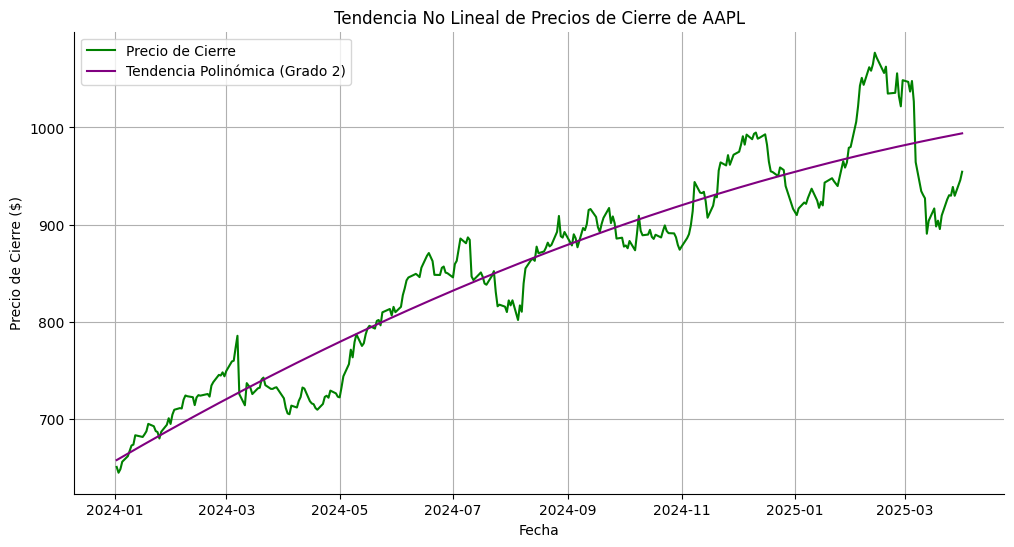

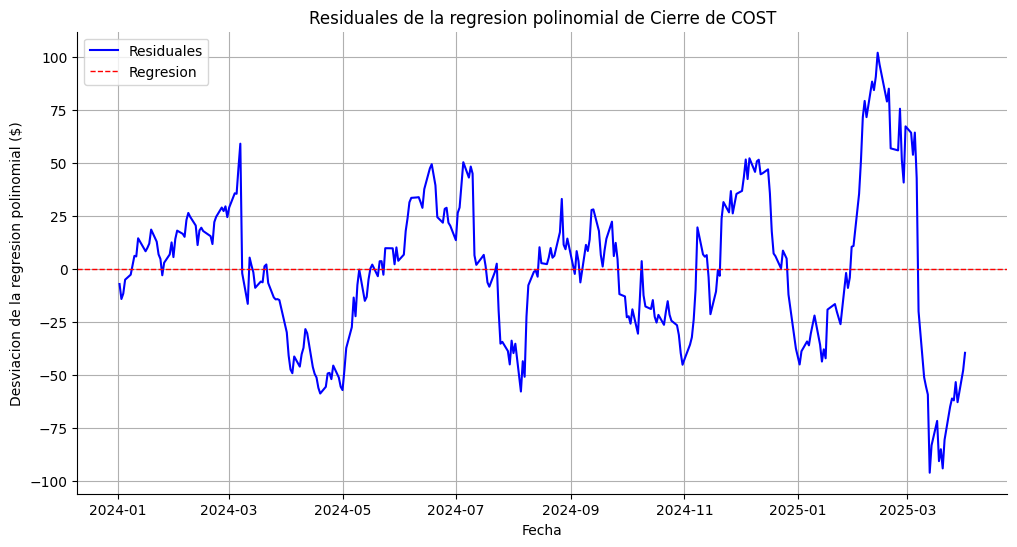

In [27]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['COST_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

###**Analisis:**

En el gráfico de residuales se observa que los valores estan entre los -20 y +25 dólares, aunque se presentan desviaciones más grandes a finales de 2024 e inicios de 2025. Estas variaciones son un poco bruscas, lo que puede decir que hubo  cambios en el mercado.

In [28]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['GOOGL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.019169  3509.999325         52.166667
1    0.015974  3475.911473         62.600000
2    0.012780  3059.865582         78.250000
3    0.025559  2702.650497         39.125000
4    0.022364  2418.614841         44.714286


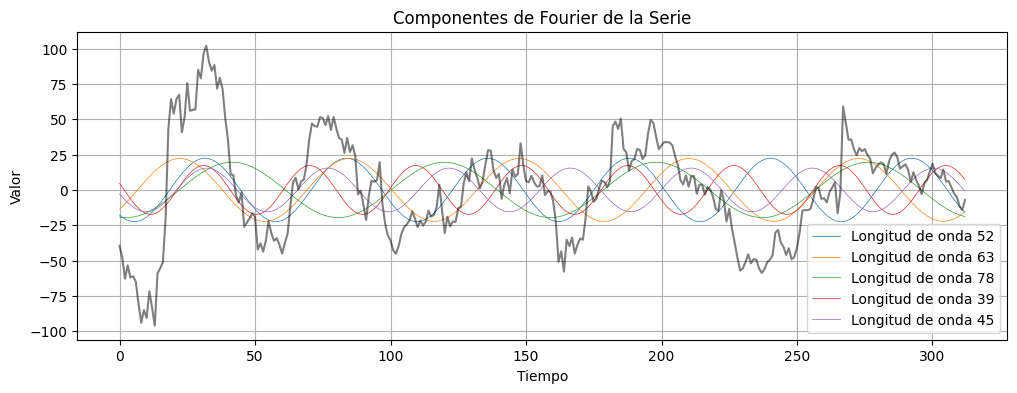

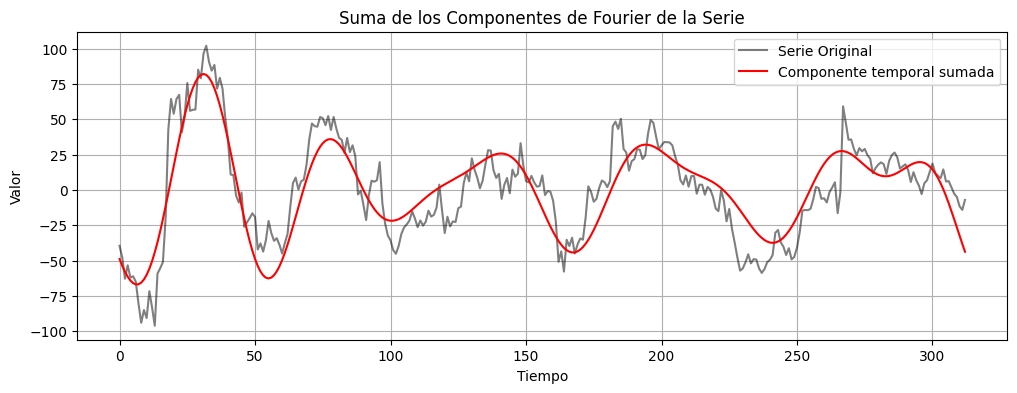

In [29]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


###**Analisis:**

En el grafico de componenete de fourer se presentan varias ondas simples que tratan de explicar el precio de COSTCO. Estas ondas representa un patrón que se repite con freceuncia, ya que las ondas al parecer se ve que no varian mucho, las ondas tiene una longitud mas pequeña a comparacion de las ondas de TGT.

Al hacer los cálculos basándome en los 252 dias, si dividimos la longitud de 63/ 252 nos da exactamente los 0.25 lo que nos indica que ahí está el pico. Asi mismo también nos muestra una estacionalidad casi perfecta.

En el grafico de l suma de componentes la línea gris sigue siendo el precio original de COSTCO y la línea roja es la suma de las ondas de colores, y en la línea roja se muestra el comportamiento del precio, y se ve que no tiene mucho ruido ni movimientos bruscos, lo cual se puede interpretar como que el comportamiento del precio de COSTCO contiene patrones que se repiten .

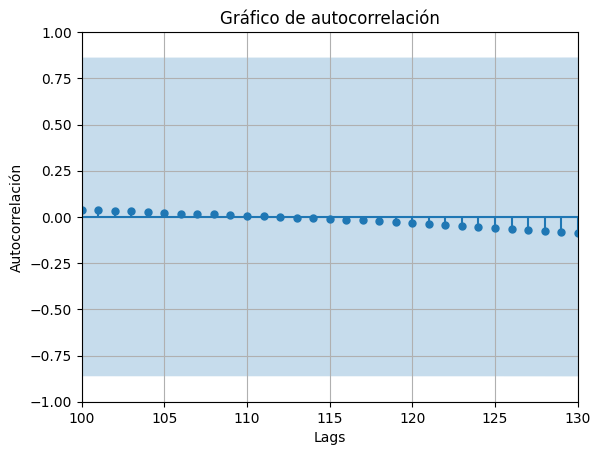

In [30]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['COST_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

###**Analisis:**

Todos los puntos están muy cerca de cero y dentro de la zona azul y esto dice que no hay una relación significativa entre los valores de la grafica.Lo que quiere decir que los valores pasados de hace 100 a 130 días no ayudan a predecir el valor actual.




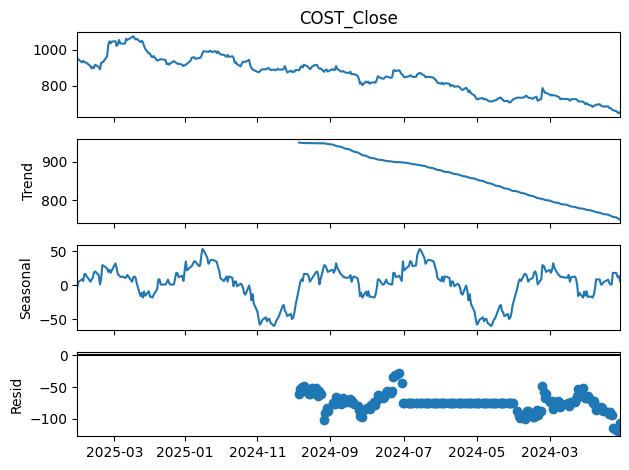

In [31]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['COST_Close'],
    model='additive',
    period=126,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

###**Analisis:**
Tendencia:

 El grafico de  Tendencia muestra la dirección general del precio a lo largo del tiempo, ignorando fluctuaciones pequeñas, y se ve  que el precio ha estado bajando de forma constante.

Estacionalidad:

El grafico muestra los cambios que suben y bajan de forma parecida una y otra vez, el precio tiende a subir o bajar de forma regular lo que me hace interpretar que el comportamiento del precio sigue ciertos patrones que a lo mejo pueden estar influidos por la temporada o epoca en la que se envuentre.

Ruido:

Tienen un comportamiento de ruido de forma aleatoria, con pequeñas subidas y bajadas, peo en algun punto el precio se desvió mucho, pudo ser que influyera el como se encuentra la economia o que en la actualidad ya hy mas tiendas comerciales y las personas prefieren ir a otras y eso baja las ventas y preferencias de ls personas.



# **Modelo Prophet**



In [32]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='COST',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2018-01-01',        # Fecha de inicio
    end='2018-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COST']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,COST_Open,COST_High,COST_Low,COST_Close,COST_Adj Close,COST_Volume
Date,,,,,,


In [33]:
pip install alpha_vantage

In [34]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = ' KSZKZM73673SN0XD'   # esta es mía, no la uses o habrá problemas

# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')


ticker = 'COST'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,COST_Open,COST_High,COST_Low,COST_Close,COST_Volume
date,,,,,
2025-04-01,942.42,957.7236,938.7500,954.40,2041507.0
2025-03-31,922.36,995.0000,922.0432,945.78,3101963.0
2025-03-28,937.50,938.7500,926.0000,929.66,2100487.0
2025-03-27,929.56,942.9037,928.0000,938.75,1546989.0
2025-03-26,934.33,939.4151,923.4500,929.75,1646854.0
...,...,...,...,...,...
2024-01-08,655.81,662.0800,654.0338,661.69,2245294.0
2024-01-05,656.18,659.6500,652.2400,656.01,2200193.0
2024-01-04,642.08,649.9000,640.5101,648.35,2171077.0


In [35]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/6r3lglyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/ng0unwj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74303', 'data', 'file=/tmp/tmpg3fsjcgq/6r3lglyu.json', 'init=/tmp/tmpg3fsjcgq/ng0unwj0.json', 'output', 'file=/tmp/tmpg3fsjcgq/prophet_modelovefx6te/prophet_model-20250511044855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


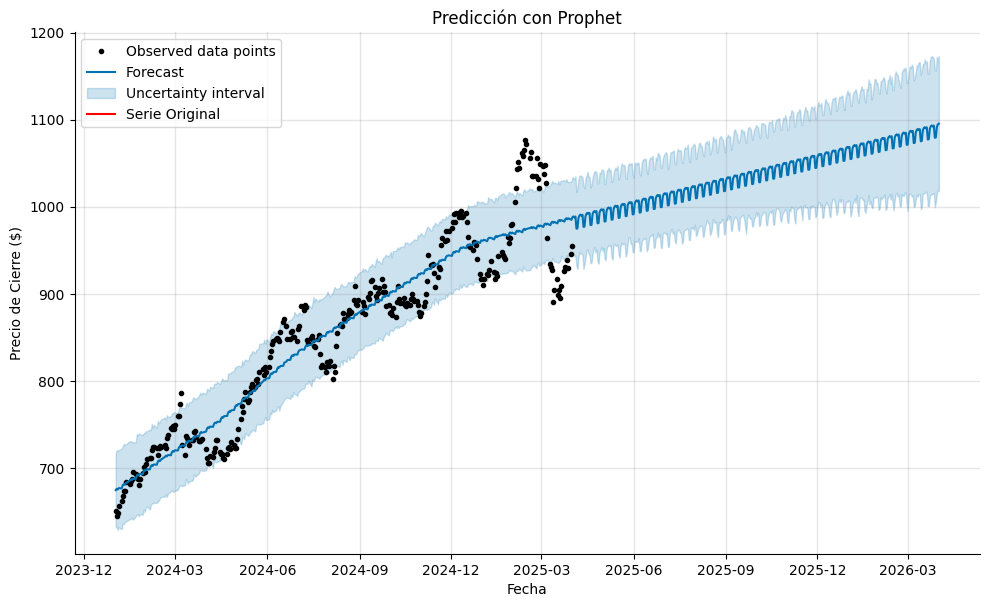

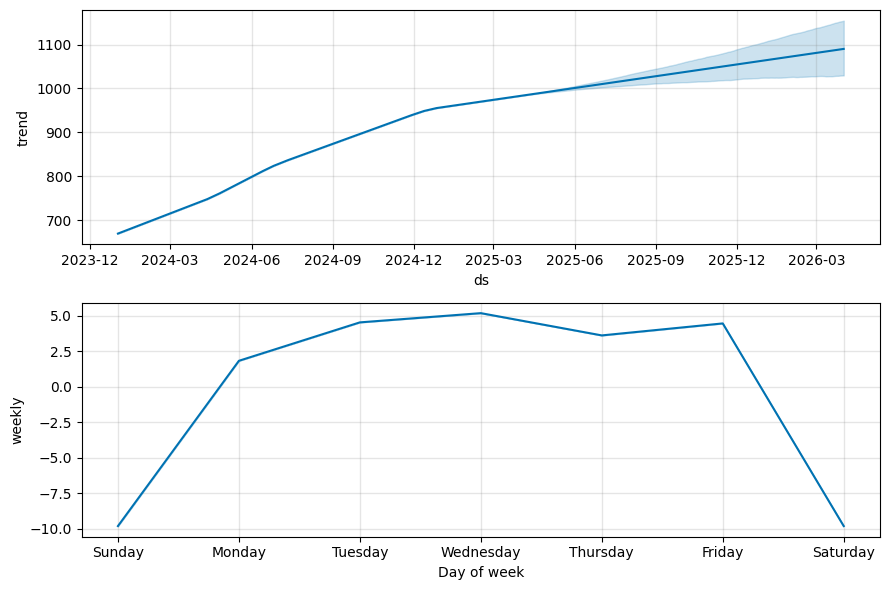

In [36]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
df = df.reset_index()
modelo.fit(df[['date', 'COST_Close']].rename(columns={'date': 'ds', 'COST_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['COST_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/3ut4fvok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg3fsjcgq/bg1ud58r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40957', 'data', 'file=/tmp/tmpg3fsjcgq/3ut4fvok.json', 'init=/tmp/tmpg3fsjcgq/bg1ud58r.json', 'output', 'file=/tmp/tmpg3fsjcgq/prophet_model7kwkda6q/prophet_model-20250511044856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


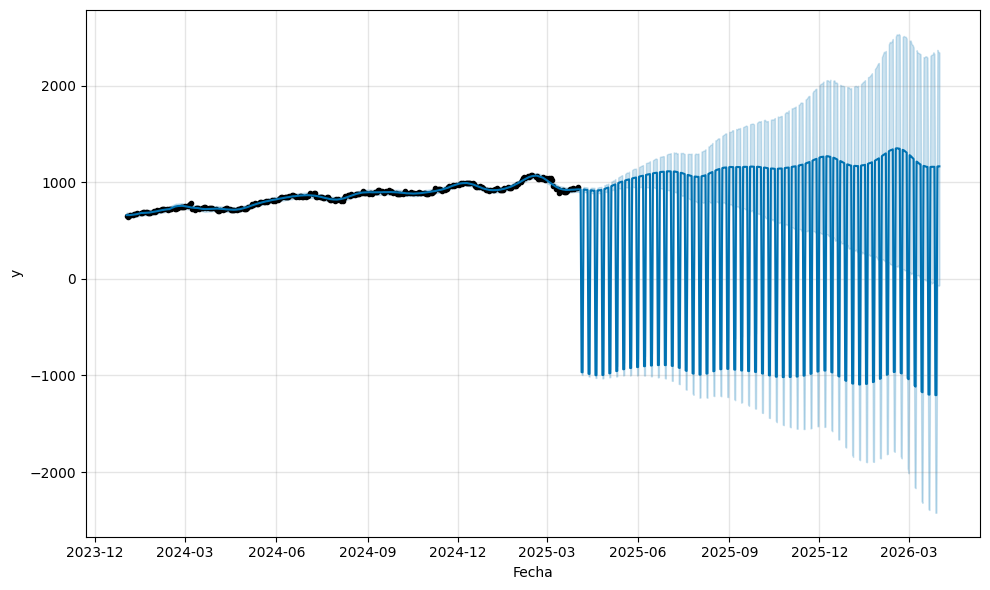

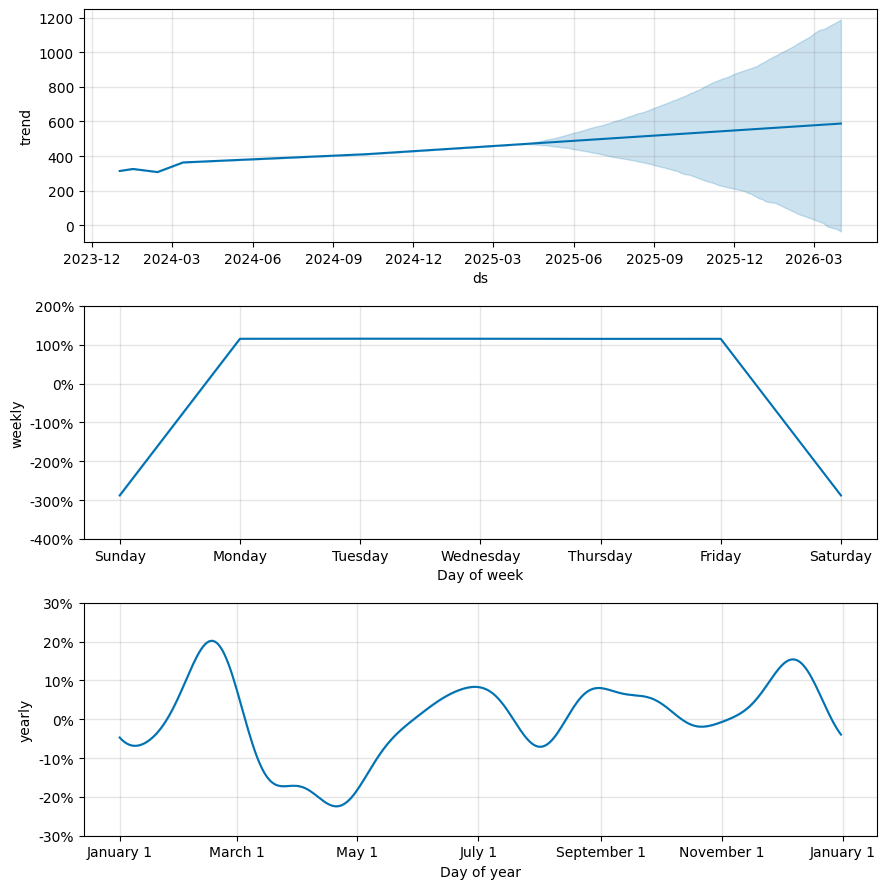

In [37]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df.reset_index()[['date', 'COST_Close']].rename(columns={'date': 'ds', 'COST_Close': 'y'}))


# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['COST_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


###**Analisis:**

Grafico tendencia:
muestra como esperan que aumenten as vebtas.

Grafico weekly:
Se ve que los dias que tiene las ventas son de lunes a viernes y los domingos y sábados tienen  menos ventas, pero las ventas caen aun mas los domingos.

Grafico yearly: El gráfico  muestra que los precios de las acciones de Costco suben en temporadas de más ventas, como primavera o Navidad, pero bajan en meses como abril y mayo, con este grafico le sirve a COSTCO para tener más productos en ventas en las temporadas altas y ofrecer descuentos en enero o mayo para vender lo que quedó de temporadas pasadas.



# **Causalidad de granger**

La Prueba de Causalidad de Granger es un procedimiento estadístico utilizado paradeterminar si una serie temporal puede predecir de manera significativa otra serietemporal. Esta prueba lleva el nombre de Clive Granger, quien desarrolló esteconcepto en la década de 1960.

La idea central detrás de la Prueba de Causalidad de Granger es evaluar si laadición de información pasada de una serie temporal mejora la capacidad depredecir otra serie temporal en comparación con un modelo que solo utilizainformación pasada de la segunda serie temporal.

La prueba generalmente se lleva a cabo en dos etapas:

Modelado de las series temporales En esta etapa, se ajustan modelosautorregresivos (AR) a cada una de las series temporales por separado utilizandosolo sus propias observaciones pasadas como predictores.

Prueba de causalidad: Una vez estimados los modelos autorregresivos, secomparan los errores de predicción de un modelo que incluye las observacionespasadas de ambas series temporales con un modelo que solo incluye lasobservaciones pasadas de una de las series temporales. Se utiliza una pruebaestadística para determinar si la inclusión de las observaciones pasadas de laprimera serie temporal mejora significativamente la capacidad de predecir lasegunda serie temporal

In [6]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

# API Key
my_key = 'KSZKZM73673SN0XD'
ts = TimeSeries(key=my_key, output_format='pandas')

# Descargar datos TSM
data_tsm, _ = ts.get_daily(symbol='TGT', outputsize='full')
data_tsm.columns = ['TGT_Open', 'TGT_High', 'TGT_Low', 'TGT_Close', 'TGT_Volume']
data_tsm = data_tsm.sort_index()  # <- línea clave
df_tsm = data_tsm.loc['2020-01-01':'2025-04-01']


# Descargar datos ORCL
data_orcl, _ = ts.get_daily(symbol='COST', outputsize='full')
data_orcl.columns = ['COST_Open', 'COST_High', 'COST_Low', 'COST_Close', 'COST_Volume']
data_orcl = data_orcl.sort_index()  # <- línea clave
df_orcl = data_orcl.loc['2020-01-01':'2025-04-01']

# Unir y limpiar
df = pd.concat([df_tsm['TGT_Close'], df_orcl['COST_Close']], axis=1).dropna()

# Prueba de Estacionariedad
def prueba_adf(serie, nombre):
    resultado = adfuller(serie)
    print(f'--- ADF para {nombre} ---')
    print(f'Estadístico ADF: {resultado[0]}')
    print(f'p-valor: {resultado[1]}')
    print(f'Valores críticos: {resultado[4]}\n')

prueba_adf(df['TGT_Close'], 'TSM')
prueba_adf(df['COST_Close'], 'ORCL')

# Diferenciar si no son estacionarias
if adfuller(df['TGT_Close'])[1] > 0.05:
    df['TGT_Close'] = df['TGT_Close'].diff()
if adfuller(df['COST_Close'])[1] > 0.05:
    df['COST_Close'] = df['COST_Close'].diff()

df = df.dropna()

# Prueba de Granger
print("\n--- ¿TGT causa COST? ---")
grangercausalitytests(df[['COST_Close', 'TGT_Close']], maxlag=5, verbose=True)

print("\n--- ¿COST causa TGT? ---")
grangercausalitytests(df[['TGT_Close', 'COST_Close']], maxlag=5, verbose=True)

--- ADF para TSM ---
Estadístico ADF: -1.390662428942503
p-valor: 0.5867443904347469
Valores críticos: {'1%': np.float64(-3.435321230417535), '5%': np.float64(-2.8637353987046192), '10%': np.float64(-2.56793884010583)}

--- ADF para ORCL ---
Estadístico ADF: 0.45575315399602345
p-valor: 0.9834643576043107
Valores críticos: {'1%': np.float64(-3.4354096984769003), '5%': np.float64(-2.863774435037593), '10%': np.float64(-2.567959628657891)}


--- ¿TGT causa COST? ---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8464  , p=0.3577  , df_denom=1314, df_num=1
ssr based chi2 test:   chi2=0.8483  , p=0.3570  , df=1
likelihood ratio test: chi2=0.8481  , p=0.3571  , df=1
parameter F test:         F=0.8464  , p=0.3577  , df_denom=1314, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7710  , p=0.4628  , df_denom=1311, df_num=2
ssr based chi2 test:   chi2=1.5479  , p=0.4612  , df=2
likelihood ratio test: chi2=1.5470  , p=0.4614  , df

{np.int64(1): ({'ssr_ftest': (np.float64(0.01585233116561087),
    np.float64(0.8998255616425577),
    np.float64(1314.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.015888523702518656),
    np.float64(0.8996925933161394),
    np.int64(1)),
   'lrtest': (np.float64(0.015888427860772936),
    np.float64(0.8996928942517101),
    np.int64(1)),
   'params_ftest': (np.float64(0.015852331165241755),
    np.float64(0.8998255616439332),
    np.float64(1314.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.3101348396527813),
    np.float64(0.7334018534244551),
    np.float64(1311.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(0.6226353150008547),
    np.float64(0.7324811607747999),
    np.int64(2)),
   'lrtest': (np.float64(0.622488068610437),
    np.float64(0.7325350903634963),
    np.int64(2)),
   'params_ftest': (np.float64(0.31013483965261485),
    np.float64(0.7334018534245084),
    np.float64(1311.0),
    2.0)},
   array([[0., 0., 1., 0., 

###**Analisis:**

**Ho= p-valor ≤ 0.05 → Hay evidencia de causalidad**

**H1= p-valor > 0.05 → No hay evidencia de causalidad**

¿TGT causa COST?

Rezago 1: p=0.3577

Rezago 2: p=0.4628

Rezago 3: p=0.0763   el más cercano a significancia de 0.05

Rezago 4: p=0.0658

Rezago 5: p=0.1113

 No hay evidencia  de casualidad, en que TGT cause algo en COSTCO. Los p-valores son consistentemente altos, indicando que no podemos rechazar la hipótesis nula de que TGT no predice nada de COSTCO.

¿COST causa TGT?


Rezago 1: p=0.8998

Rezago 2: p=0.7334

Rezago 3: p=0.7113

Rezago 4: p=0.5457

Rezago 5: p=0.5386

No hay evidencia de que COST cause  algo a TGT. Los valores son más altos que en los pasados, asi que no hay relación de causalidad.




# **Conclusiones:**



TGT y COSTCO son dos empresas que, en general, muestran una tendencia positiva a lo largo del tiempo, lo que significa que sus precios o ventas han ido creciendo, pero TGT presenta muchas  variaciones que hacen que sea más difícil predecir su comportamiento en un futuro. Esto puede ser por factores como la economía del país o sucesos inesperados. En cambio, COSTCO tiene un comportamiento más estable, aunque también tiene algunas variaciones, pero estas son más fáciles de entender. En cuanto a sus mayores dias de ventas, TGT vende más los fines de semana, especialmente los domingos, lo que sirve para saber cuándo hacer más publicidad o tener más personal en las tiendas, y COSTCO,es lo contrario porque vende mas de lunes a viernes, y sus ventas bajan mucho los domingos, lo que muestra un comportamiento diferente al de Target. Al año, ambas empresas aumentan sus ventas en fechas importantes como el Black Friday, Navidad o el 4 de julio. TGT si depende mucho de estas fechas para  sus ventas, pero COSTCO tiene un patrón más claro, con subidas en primavera y finales de año. Esta información puede ayudar a ambas empresas a planear mejor su inventario para tener más productos en temporadas altas y ofrecer descuentos en meses bajos para vender lo que queda. Finalmente puedo decir que TGT necesita adaptarse  a los cambios y preparar sus promociones e inventario  según la temporada, mientras que COSTCO vende con mas facilidad porque aunque sean temporadas bajas sigue vendiendo a lo largo del año.



